   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


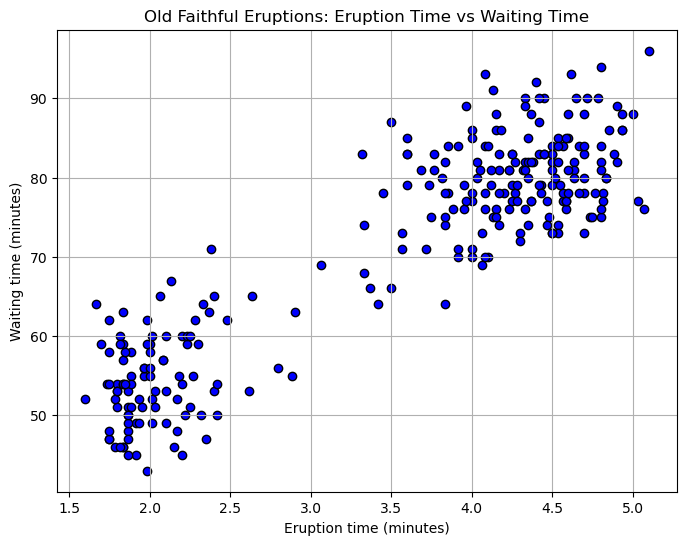


K-Means converged in 4 iterations.

Final Cluster Centers:
Cluster 1: [ 4.29793023 80.28488372]
Cluster 2: [ 2.09433 54.75   ]


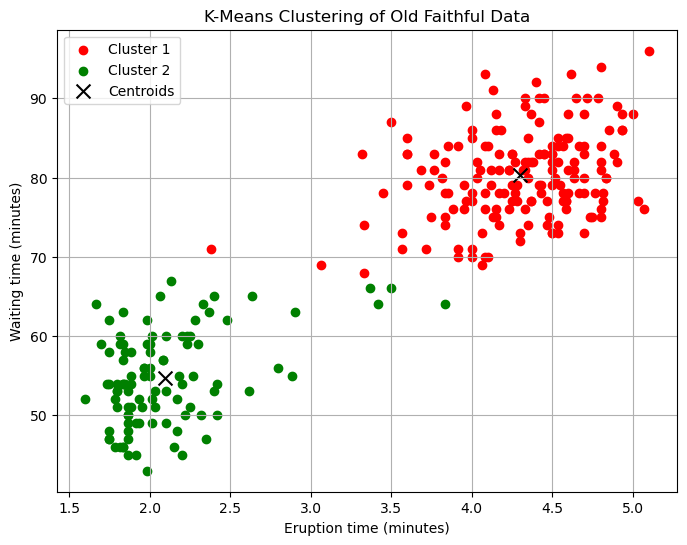

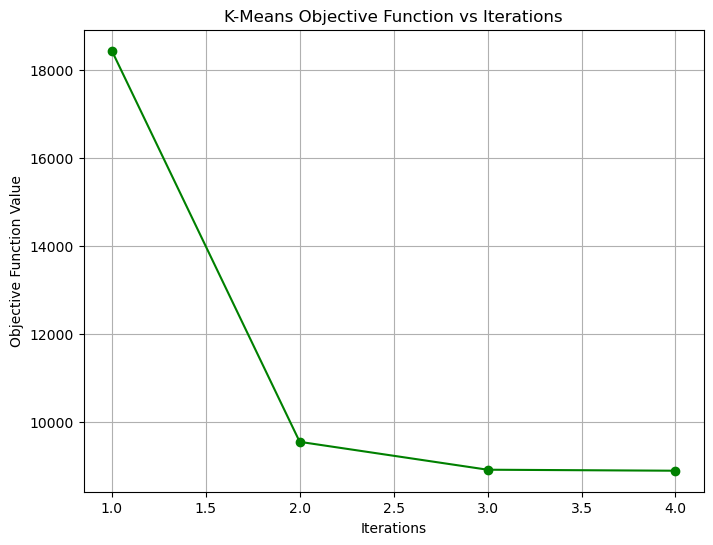

In [1]:
# Homework 3: Old Faithful Geyser Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('faithful.csv')
print(data.head())

# Problem 1a) Scatter plot of eruption time vs waiting time
plt.figure(figsize=(8, 6))
plt.scatter(data['eruptions'], data['waiting'], c='blue', edgecolor='k')
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('Old Faithful Eruptions: Eruption Time vs Waiting Time')
plt.grid(True)
plt.show()

# Problem 2a) Implement K-Means from Scratch

# Prepare data
X = data[['eruptions', 'waiting']].values
k = 2  # Based on observation from Problem 1
max_iters = 100
tolerance = 1e-4

np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# K-Means Main Loop
for iteration in range(max_iters):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    
    if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tolerance):
        break
    centroids = new_centroids

# Final cluster assignment
data['cluster'] = labels + 1  # Label clusters as 1 and 2 instead of 0 and 1

# Print results
print(f"\nK-Means converged in {iteration + 1} iterations.")
print("\nFinal Cluster Centers:")
for i in range(k):
    print(f"Cluster {i+1}: {centroids[i]}")

# Scatter Plot of Final Clusters
colors = ['red', 'green']
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[cluster], label=f'Cluster {cluster+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('K-Means Clustering of Old Faithful Data')
plt.legend()
plt.grid(True)
plt.show()

# 2c) Plotting K-Means Objective Function vs Iterations

def k_means(X, k, max_iters=100, seed=42):
    np.random.seed(seed)
    centroids = X[np.random.choice(len(X), k, replace=False)]
    objective_values = []
    
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Objective function
        distances = np.sum((X - centroids[labels])**2, axis=1)
        objective = np.sum(distances)
        objective_values.append(objective)
        
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        
    return centroids, labels, objective_values

# Run clean K-Means
centroids, labels, objective_values = k_means(X, k)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(objective_values)+1), objective_values, marker='o', color='green')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('K-Means Objective Function vs Iterations')
plt.grid(True)
plt.show()
